In [37]:
import matplotlib.pyplot as plt
import random
import math

## Task 1

In [2]:
V={}
V[-1]=V[5]=0 #终止状态价值函数为0
V[0]=V[1]=V[2]=V[3]=V[4]=0.5
R={}
R[-1]=0
R[0]=R[1]=R[2]=R[3]=R[4]=0
R[5]=1

In [3]:
itera=101
alpha=0.1
gamma=1

In [4]:
def episode():
    state=[]
    pos=2
    state.append(pos)
    while True:
        c=random.choice([-1,1])
        r=R[pos+c]
        s=pos+c
        V[pos]+=alpha*(r+gamma*V[s]-V[pos])
        pos=s
        state.append(pos)
        if pos==-1 or pos==5:
            return state,V[pos]

In [5]:
p=[]
l=[]
for j in range(5):
    l.append(V[j])
p.append(l)

for i in range(1,itera):
    episode() #在函数内对V进行更新
    if i==1 or i==10 or i==100:
        l=[]
        for j in range(5):
            l.append(V[j])
        p.append(l)

In [6]:
print(p)

[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.55], [0.3351667777247209, 0.4244275985745767, 0.49602418152957317, 0.552251116, 0.691055632], [0.15235832284645118, 0.3844689113498391, 0.6196869991404308, 0.7553902980852905, 0.8848928997479536]]


Text(0.5, 1.0, 'estimated value')

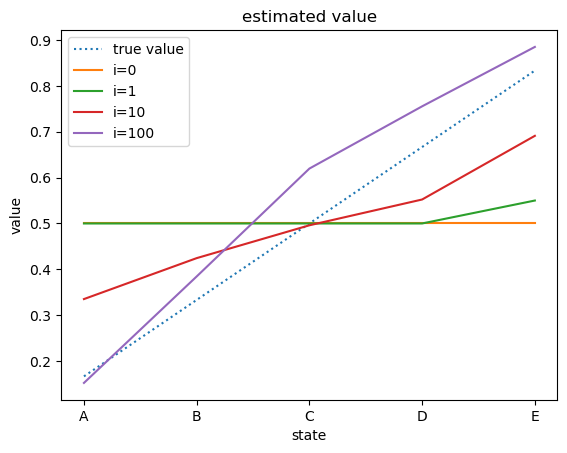

In [7]:
x=["A","B","C","D","E"]
y=[1./6,2./6,3./6,4./6,5./6]
z=[0,1,10,100]
cnt=0
plt.plot(x,y,':',label="true value")
for i in p:
    plt.plot(x,i,label="i="+str(z[cnt]))
    cnt+=1
    plt.legend()
plt.xlabel("state")
plt.ylabel("value")
plt.title("estimated value")

## task 2

In [41]:
MC_alpha=[0.01,0.02,0.03,0.04]
TD_alpha=[0.1,0.15,0.05]
iterations=500
R={}
R[-1]=0
R[0]=R[1]=R[2]=R[3]=R[4]=0
R[5]=1
error_MC=[]
error_TD=[]
episodes=100

In [42]:
def calc_error(V):
    correct=[1./6,2./6,3./6,4./6,5./6]
    error=0.0
    for i in range(5):
        error+=(correct[i]-V[i])**2
    return math.sqrt(error/5)

In [43]:
def episode_MC():
    state=[]
    pos=2
    state.append(pos)
    while True:
        c=random.choice([-1,1])
        pos=pos+c
        if pos==-1 or pos==5:
            return state,R[pos]
        state.append(pos)

In [53]:
def episode_TD(V,alpha):
    pos=2
    while True:
        c=random.choice([-1,1])
        r=R[pos+c]
        s=pos+c
        V[pos]+=alpha*(r+V[s]-V[pos])
        pos=s
        if pos==-1 or pos==5:
            return V

In [45]:
def MC_update(V,reward,state,alpha):
    appear={}
    avail=[]
    for i in range(len(state)):
        if state[i] not in appear:
            avail.append(1)
        else:
            avail.append(0)
        appear[state[i]]=1
    for i in range(len(state)-1,-1,-1):
        if avail[i]:
            V[state[i]]+=alpha*(reward-V[state[i]])
    return V

In [46]:
for index in MC_alpha:
    all_error=[0]*100
    for it in range(iterations):
        V={}
        V[-1]=V[5]=0 #终止状态价值函数为0
        V[0]=V[1]=V[2]=V[3]=V[4]=0.5
        for ep in range(episodes):
            state,reward=episode_MC()
            V=MC_update(V,reward,state,index)
            all_error[ep]+=(calc_error(V))
    for i in range(100):
        all_error[i]/=iterations
    error_MC.append(all_error)

In [54]:
for index in TD_alpha:
    all_error=[0]*100
    for it in range(iterations):
        V={}
        V[-1]=V[5]=0 #终止状态价值函数为0
        V[0]=V[1]=V[2]=V[3]=V[4]=0.5
        for ep in range(episodes):
            V=episode_TD(V,index)
            all_error[ep]+=(calc_error(V))
    for i in range(100):
        all_error[i]/=iterations
    error_TD.append(all_error)

Text(0.5, 1.0, 'comparison between MC and TD')

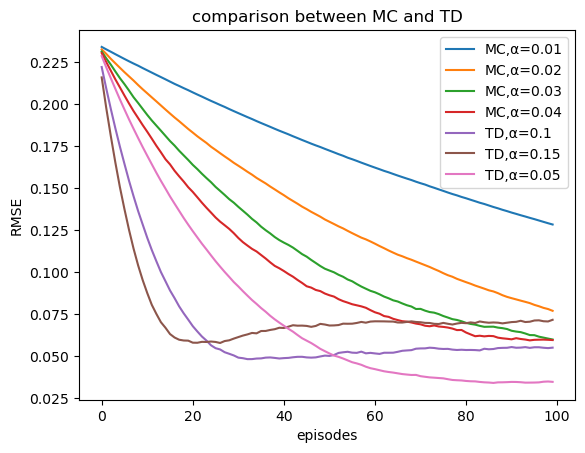

In [60]:
x=[i for i in range(100)]
for i in range(len(MC_alpha)):
    plt.plot(x,error_MC[i],label="MC,α="+str(MC_alpha[i]))  
for i in range(len(TD_alpha)):
    plt.plot(x,error_TD[i],label="TD,α="+str(TD_alpha[i]))
plt.legend()
plt.xlabel('episodes')
plt.ylabel('RMSE')
plt.title("comparison between MC and TD")